# Navigation Task

In [1]:
import torch
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from model.kohonen_som import KohonenSOM
from model.manager_som_position import ManagerSOMPosition, ManagerSOMPositionAllNeighbor
from custom_env.navigation_task import NavigationTask
import pickle
%matplotlib inline

path exception


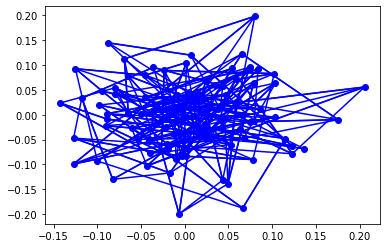

/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


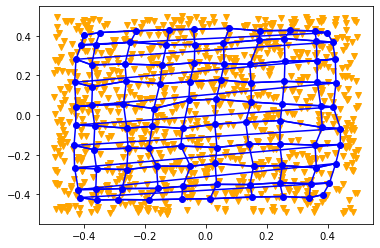

tensor([[-0.3998,  0.4028],
        [-0.3471,  0.4163],
        [-0.2272,  0.4252],
        [-0.1196,  0.4305],
        [-0.0400,  0.4327],
        [ 0.0772,  0.4375],
        [ 0.1773,  0.4248],
        [ 0.2767,  0.4276],
        [ 0.3575,  0.4241],
        [ 0.3985,  0.4151],
        [-0.4084,  0.3547],
        [-0.3610,  0.3555],
        [-0.2473,  0.3675],
        [-0.1287,  0.3542],
        [-0.0359,  0.3559],
        [ 0.0579,  0.3628],
        [ 0.1757,  0.3787],
        [ 0.2576,  0.3860],
        [ 0.3628,  0.3737],
        [ 0.4158,  0.3681],
        [-0.4253,  0.2815],
        [-0.3740,  0.2532],
        [-0.2649,  0.2576],
        [-0.1431,  0.2515],
        [-0.0373,  0.2647],
        [ 0.0605,  0.2588],
        [ 0.1446,  0.2567],
        [ 0.2595,  0.2726],
        [ 0.3642,  0.2744],
        [ 0.4245,  0.2831],
        [-0.4297,  0.1652],
        [-0.3715,  0.1425],
        [-0.2601,  0.1715],
        [-0.1503,  0.1582],
        [-0.0524,  0.1690],
        [ 0.0491,  0

In [2]:
"""
Initialization
"""

x = torch.rand(1000, 2)-0.5
maxitr = 10**4*5
som = KohonenSOM(total_nodes=100, node_size=2, update_iterations=maxitr)
reshaped = som.w.reshape(10, 10, 2)
for v in range(10):
    plt.plot(reshaped[:, v, 0].numpy(), reshaped[:, v, 1].numpy(), marker='None', linestyle='-', color='blue')
    plt.plot(reshaped[v, :, 0].numpy(), reshaped[v, :, 1].numpy(), marker='None', linestyle='-', color='blue')
plt.plot(som.w[:, 0].numpy(), som.w[:, 1].numpy(), marker='o', color='blue')
plt.show()

"""
Training
"""
for t in range(maxitr):
    a, c = som.update(x, t, 0)
    
som_filehandler = open("../data/smc_premotor_pid/navigation_task/state_som.obj", 'wb')
pickle.dump(som, som_filehandler)
    
"""
Visualization of Trained Model
"""
plt.plot(x[:, 0].numpy(), x[:, 1].numpy(), marker='v', linestyle='None', color='orange')

som_filehandler = open("../data/smc_premotor_pid/navigation_task/state_som.obj", 'rb')
som = pickle.load(som_filehandler)

reshaped = som.w.reshape(10, 10, 2)
for v in range(10):
    plt.plot(reshaped[:, v, 0].numpy(), reshaped[:, v, 1].numpy(), marker='None', linestyle='-', color='blue')
    plt.plot(reshaped[v, :, 0].numpy(), reshaped[v, :, 1].numpy(), marker='None', linestyle='-', color='blue')
plt.plot(som.w[:, 0].numpy(), som.w[:, 1].numpy(), marker='o', color='blue')
plt.show()
som.w

In [4]:
som_filehandler = open("../data/smc_premotor_pid/navigation_task/state_som.obj", 'rb')
som = pickle.load(som_filehandler)

## Manager Self Organizing Map

/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


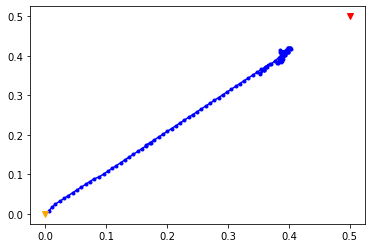

99 30.416768850303217


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


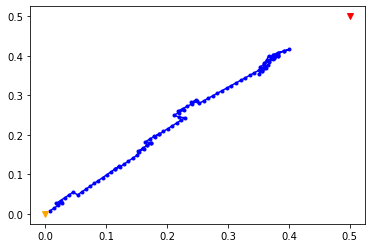

199 28.056039212543844


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


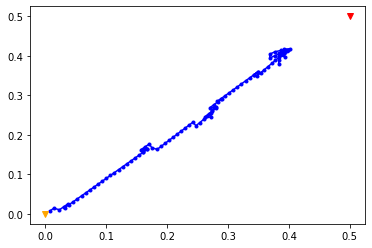

299 28.024140131056154


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


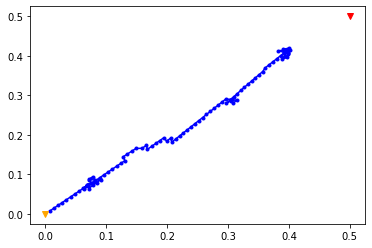

399 27.08184620435994


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


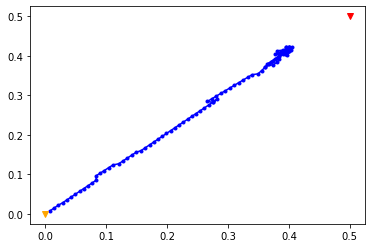

499 30.739993343953866


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


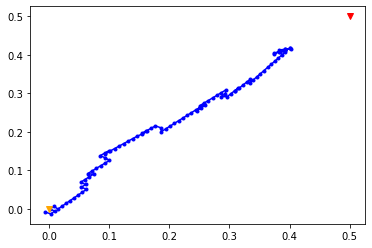

599 23.288000535990907


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


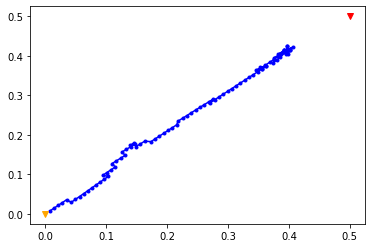

699 29.294451314421682


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


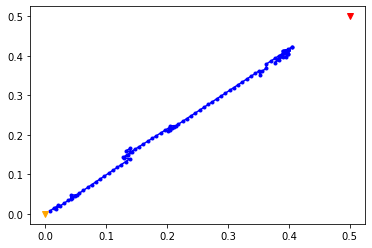

799 26.91311237686043


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


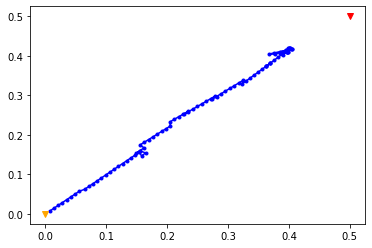

899 30.396376629728703


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


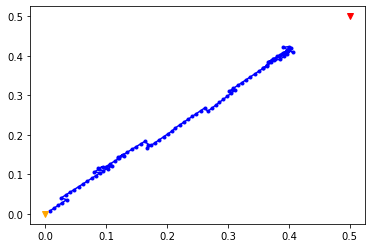

999 28.43900995532934


In [5]:
manager_maxitr = 10 ** 3
maxtime = 100
epsilon = 0.2
torch.manual_seed(0)
random.seed(0)

manager_som = ManagerSOMPosition(total_nodes=100, state_som = som, worker_som=som, update_iterations=manager_maxitr)
task = NavigationTask()

for epoch in range(manager_maxitr):
    # for visualization
    total_return = 0
    state_trajectory = []
    obs = task.state()
    
    for t in range(maxtime):
        obs = task.state()
        
        # epsilon greedy
        if random.random() > epsilon:
            action_index = manager_som.get_action(som.location[som.select_winner(obs)]) # deterministic

        else:
            action_index = random.randrange(som.total_nodes)
        
        # step forward
        reward, next_obs = task.step(som.w[action_index])
        
        # online training
        manager_som.action_q_learning(
            current_state_position = som.location[som.select_winner(obs)],
            next_state_position = som.location[som.select_winner(next_obs)],
            action_index = action_index,
            reward = reward,
            t = epoch)
        
        obs = next_obs
        state_trajectory.append(np.array(obs))
        total_return += (0.9 ** t) * reward
        
    if epoch % 100 == 99:
        plt.plot(np.array(state_trajectory)[:, 0], np.array(state_trajectory)[:, 1], marker='.', linestyle='-', color='blue')
        plt.plot(0.0, 0.0, marker='v', linestyle='None', color='orange')
        plt.plot(np.array(task.goal)[0], np.array(task.goal)[1], marker='v', linestyle='None', color='red')
        plt.show()
        print(epoch, total_return)
    
    task.reset()
    
manager_som_filehandler = open("../data/smc_premotor_pid/navigation_task/manager_som.obj", 'wb')
pickle.dump(manager_som, manager_som_filehandler)

/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


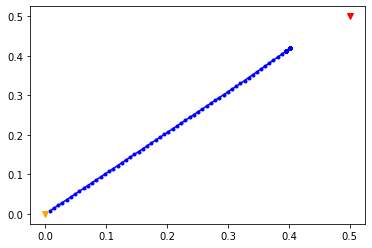

31.202431314222217


In [6]:
# for visualization
total_return = 0
state_trajectory = []

manager_som_filehandler = open("../data/smc_premotor_pid/navigation_task/manager_som.obj", 'rb')
manager_som = pickle.load(manager_som_filehandler)

for t in range(maxtime): 
    obs = task.state()
    action_index = manager_som.get_action(som.location[som.select_winner(obs)]) # deterministic

    # step forward
    reward, next_obs = task.step(som.w[action_index])

    obs = next_obs
    state_trajectory.append(np.array(obs))
    total_return += (0.9 ** t) * reward

plt.plot(np.array(state_trajectory)[:, 0], np.array(state_trajectory)[:, 1], marker='.', linestyle='-', color='blue')
plt.plot(0.0, 0.0, marker='v', linestyle='None', color='orange')
plt.plot(np.array(task.goal)[0], np.array(task.goal)[1], marker='v', linestyle='None', color='red')
plt.show()
print(total_return)

task.reset()

/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


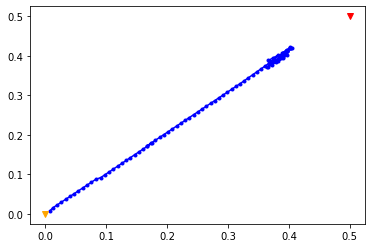

99 30.73974388129891


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


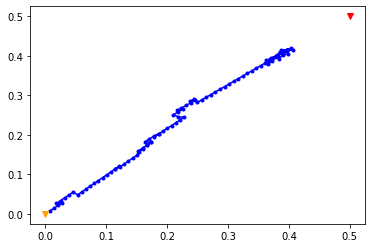

199 28.05250755056245


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


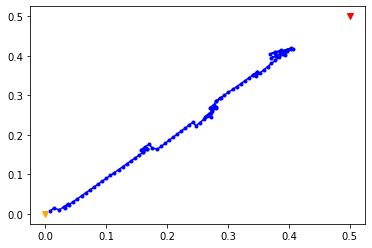

299 28.023605801354194


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


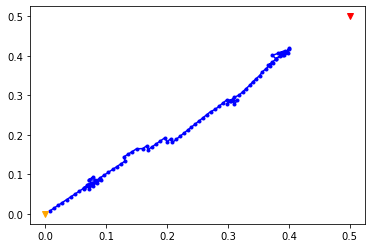

399 27.11434089370153


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


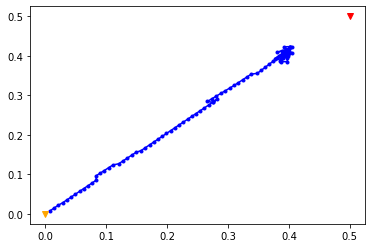

499 30.744501283722933


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


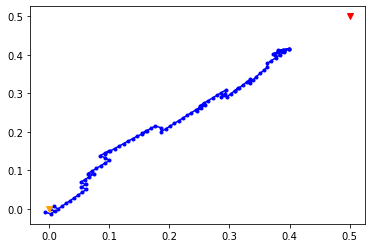

599 23.28791572832084


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


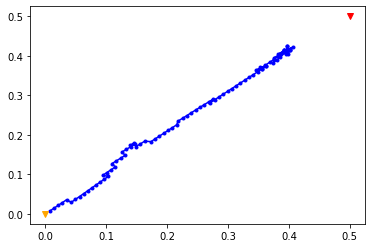

699 29.294451314421682


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


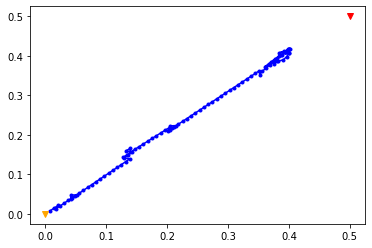

799 26.912682725423306


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


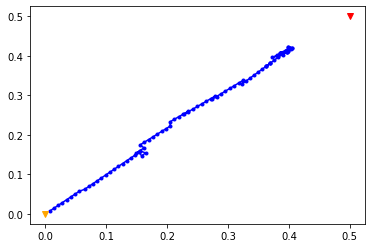

899 30.396485729147738


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


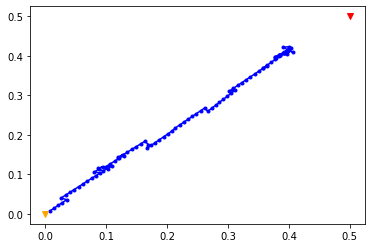

999 28.439100041723893


In [7]:
manager_maxitr = 10 ** 3
maxtime = 100
epsilon = 0.2
torch.manual_seed(0)
random.seed(0)

manager_som = ManagerSOMPositionAllNeighbor(total_nodes=100, state_som = som, worker_som=som, update_iterations=manager_maxitr)
task = NavigationTask()

for epoch in range(manager_maxitr):
    # for visualization
    total_return = 0
    state_trajectory = []
    obs = task.state()
    
    for t in range(maxtime):
        obs = task.state()
        
        # epsilon greedy
        if random.random() > epsilon:
            action_index = manager_som.get_action(som.location[som.select_winner(obs)]) # deterministic

        else:
            action_index = random.randrange(som.total_nodes)
        
        # step forward
        reward, next_obs = task.step(som.w[action_index])
        
        # online training
        manager_som.action_q_learning(
            current_state_position = som.location[som.select_winner(obs)],
            next_state_position = som.location[som.select_winner(next_obs)],
            action_index = action_index,
            reward = reward,
            t = epoch)
        
        obs = next_obs
        state_trajectory.append(np.array(obs))
        total_return += (0.9 ** t) * reward
        
    if epoch % 100 == 99:
        plt.plot(np.array(state_trajectory)[:, 0], np.array(state_trajectory)[:, 1], marker='.', linestyle='-', color='blue')
        plt.plot(0.0, 0.0, marker='v', linestyle='None', color='orange')
        plt.plot(np.array(task.goal)[0], np.array(task.goal)[1], marker='v', linestyle='None', color='red')
        plt.show()
        print(epoch, total_return)
    
    task.reset()
    
manager_som_filehandler = open("../data/smc_premotor_pid/navigation_task/manager_som_all_neighbors.obj", 'wb')
pickle.dump(manager_som, manager_som_filehandler)

/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


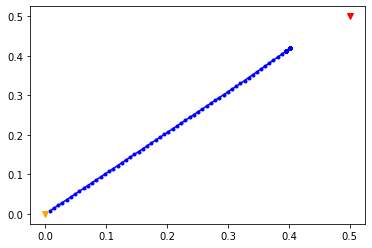

31.202431314222217


In [9]:
# for visualization
total_return = 0
state_trajectory = []

manager_som_filehandler = open("../data/smc_premotor_pid/navigation_task/manager_som_all_neighbors.obj", 'rb')
manager_som = pickle.load(manager_som_filehandler)

for t in range(maxtime): 
    obs = task.state()
    action_index = manager_som.get_action(som.location[som.select_winner(obs)]) # deterministic

    # step forward
    reward, next_obs = task.step(som.w[action_index])

    obs = next_obs
    state_trajectory.append(np.array(obs))
    total_return += (0.9 ** t) * reward

plt.plot(np.array(state_trajectory)[:, 0], np.array(state_trajectory)[:, 1], marker='.', linestyle='-', color='blue')
plt.plot(0.0, 0.0, marker='v', linestyle='None', color='orange')
plt.plot(np.array(task.goal)[0], np.array(task.goal)[1], marker='v', linestyle='None', color='red')
plt.show()
print(total_return)

task.reset()

## Visualization of SOMs

In [19]:
from IPython.display import Image

def visualize_som(som, columns, labels = ["", ""], dim = 10, location = False):
    if location:
        reshaped_x = som.location[:, columns[0]].reshape(dim, dim)
        reshaped_y = som.location[:, columns[1]].reshape(dim, dim)
        for v in range(dim):
            plt.plot(reshaped_x[:, v].numpy(), reshaped_y[:, v].numpy(), marker='None', linestyle='-', color='blue')
            plt.plot(reshaped_x[v, :].numpy(), reshaped_y[v, :].numpy(), marker='None', linestyle='-', color='blue')
        plt.plot(som.location[:, columns[0]].numpy(), som.location[:, columns[1]].numpy(), marker='o', color='blue')
        plt.xlabel(labels[0])
        plt.ylabel(labels[1])
        plt.show()
        
    else:
        reshaped_x = som.w[:, columns[0]].reshape(dim, dim)
        reshaped_y = som.w[:, columns[1]].reshape(dim, dim)
        for v in range(dim):
            plt.plot(reshaped_x[:, v].numpy(), reshaped_y[:, v].numpy(), marker='None', linestyle='-', color='blue')
            plt.plot(reshaped_x[v, :].numpy(), reshaped_y[v, :].numpy(), marker='None', linestyle='-', color='blue')
        plt.plot(som.w[:, columns[0]].numpy(), som.w[:, columns[1]].numpy(), marker='o', color='blue')
        plt.xlabel(labels[0])
        plt.ylabel(labels[1])
        plt.show()

In [22]:
som_filehandler = open("../data/smc_premotor_pid/navigation_task/state_som.obj", 'rb')
som = pickle.load(som_filehandler)

manager_som_filehandler = open("../data/smc_premotor_pid/navigation_task/manager_som.obj", 'rb')
manager_som = pickle.load(manager_som_filehandler)

In [23]:
manager_som.w.shape

torch.Size([100, 102])

0


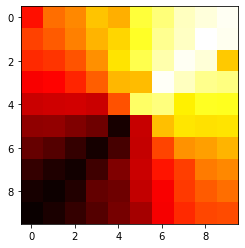

1


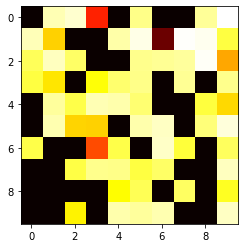

2


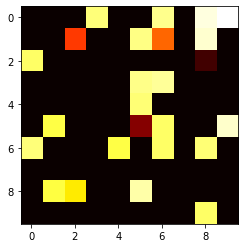

3


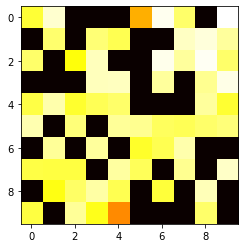

4


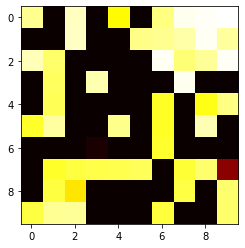

5


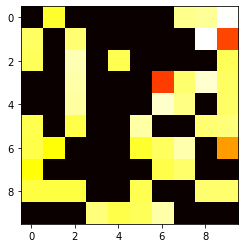

6


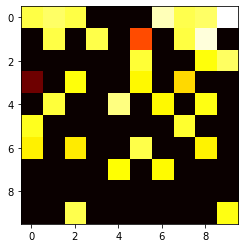

7


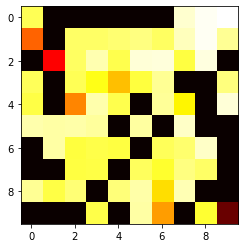

8


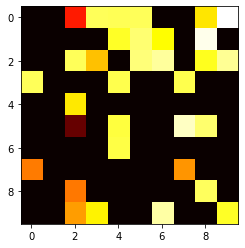

9


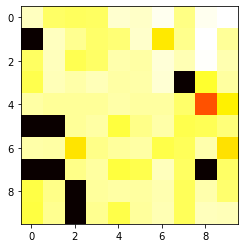

10


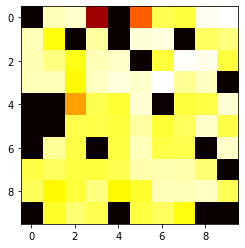

11


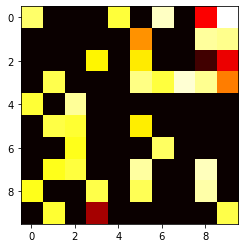

12


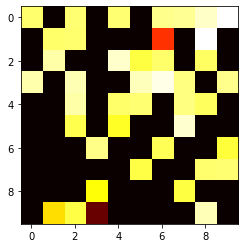

13


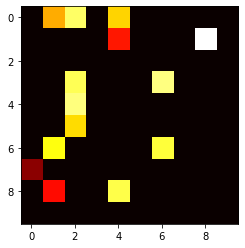

14


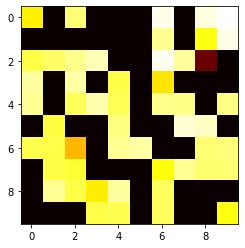

15


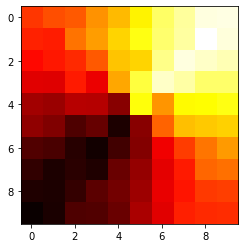

16


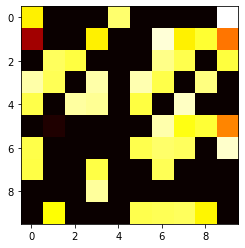

17


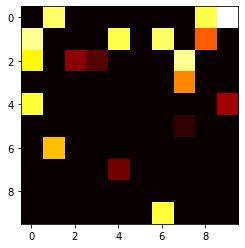

18


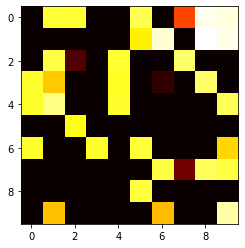

19


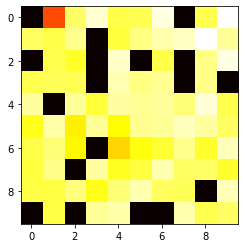

20


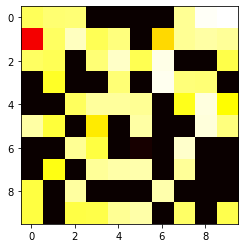

21


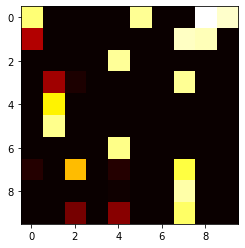

22


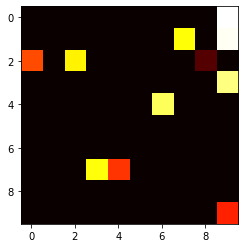

23


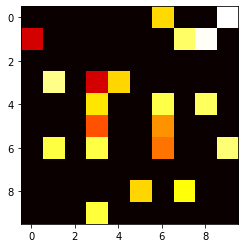

24


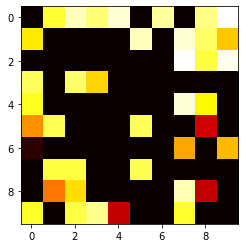

25


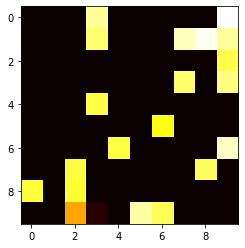

26


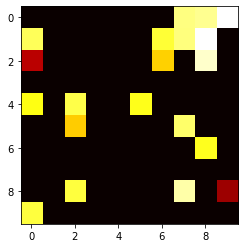

27


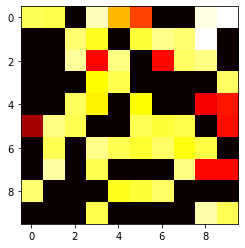

28


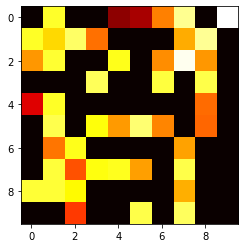

29


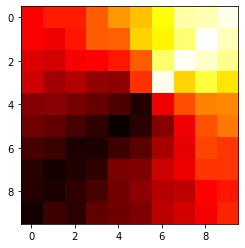

30


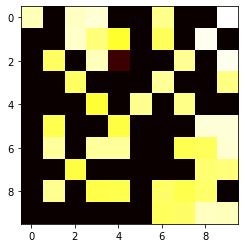

31


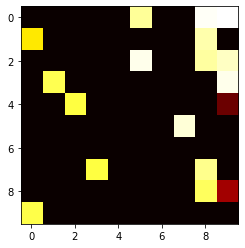

32


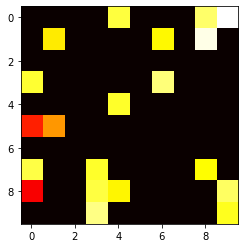

33


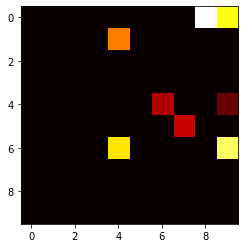

34


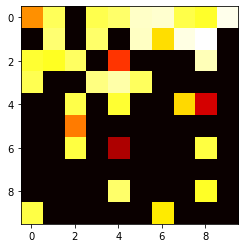

35


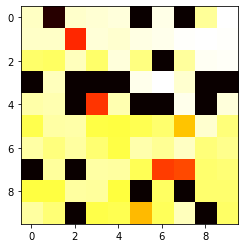

36


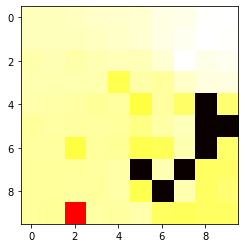

37


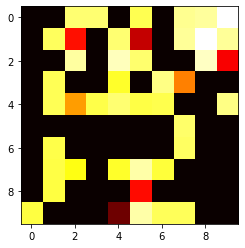

38


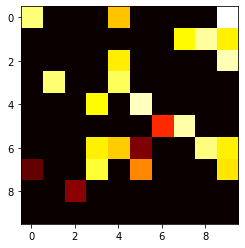

39


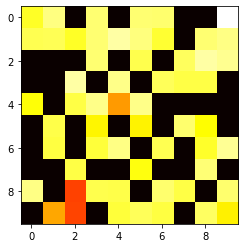

40


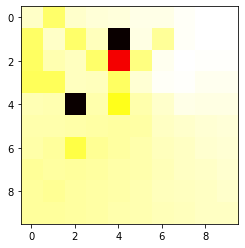

41


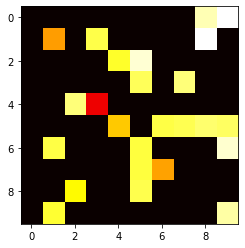

42


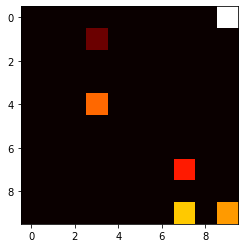

43


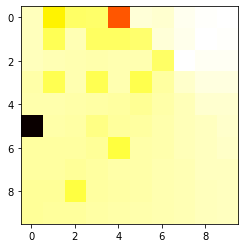

44


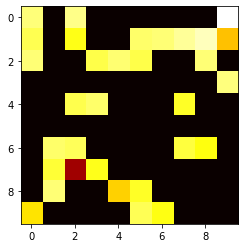

45


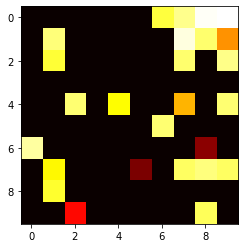

46


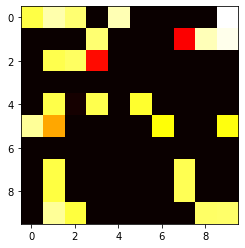

47


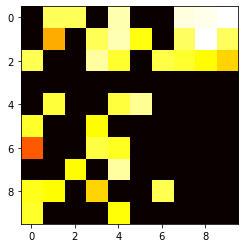

48


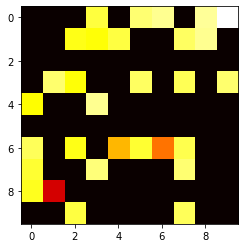

49


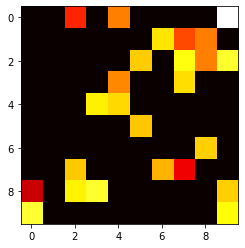

50


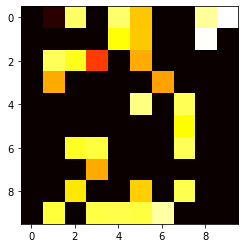

51


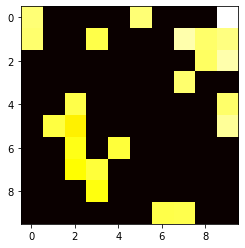

52


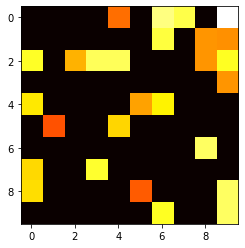

53


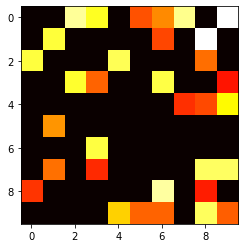

54


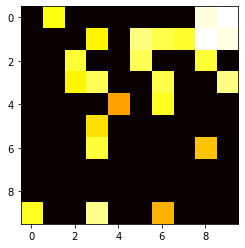

55


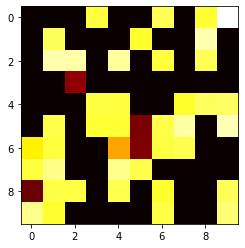

56


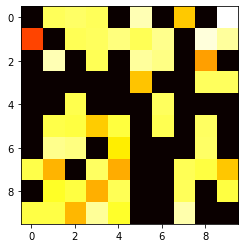

57


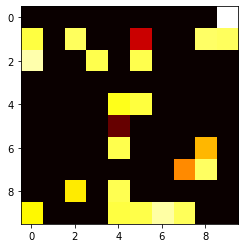

58


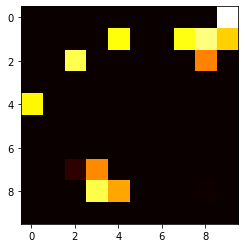

59


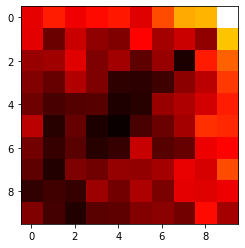

60


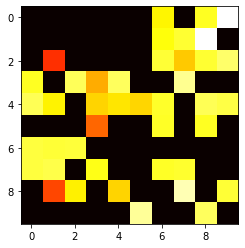

61


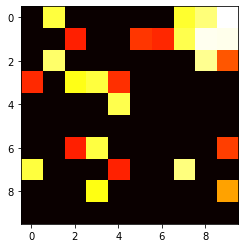

62


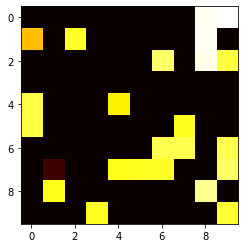

63


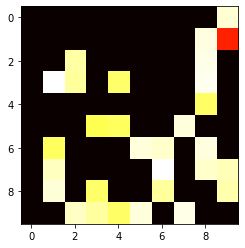

64


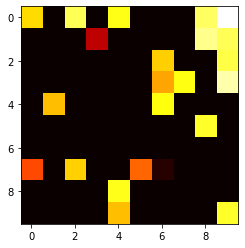

65


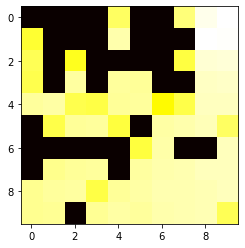

66


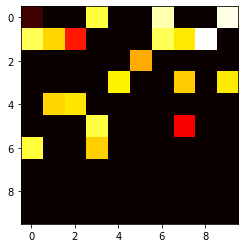

67


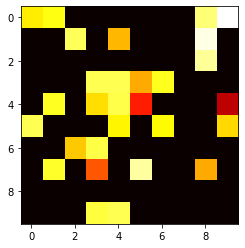

68


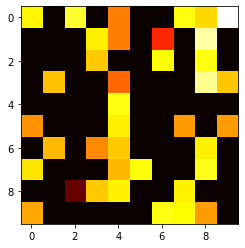

69


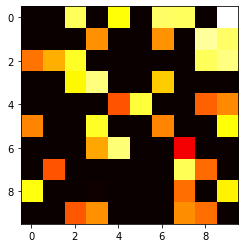

70


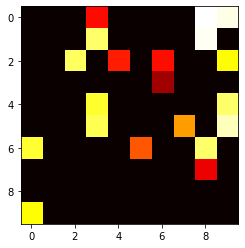

71


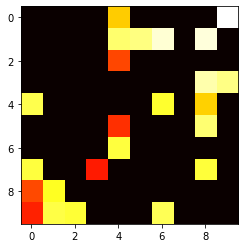

72


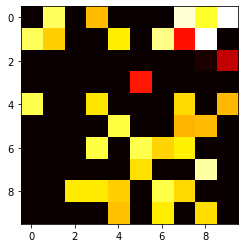

73


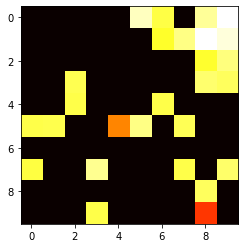

74


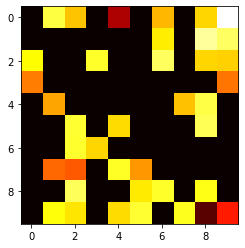

75


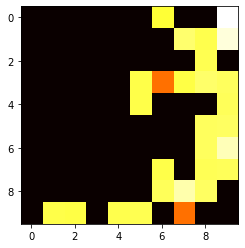

76


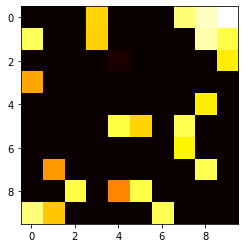

77


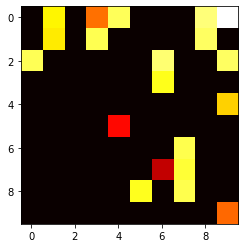

78


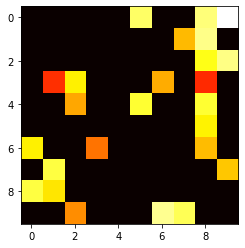

79


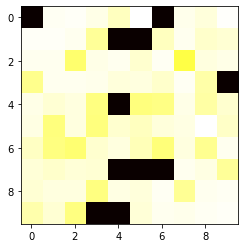

80


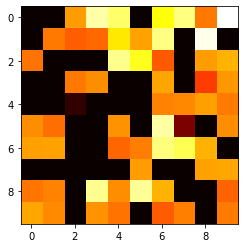

81


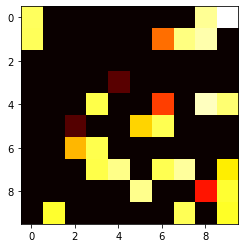

82


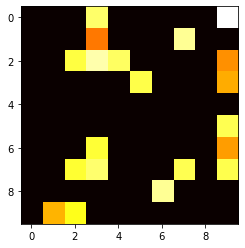

83


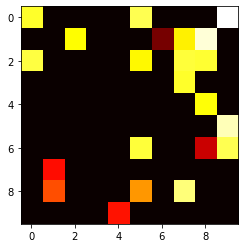

84


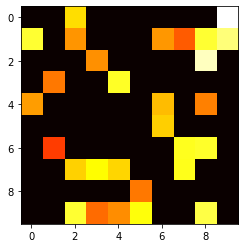

85


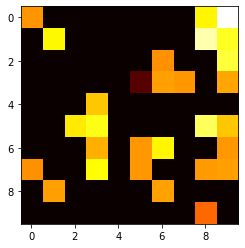

86


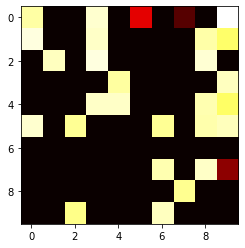

87


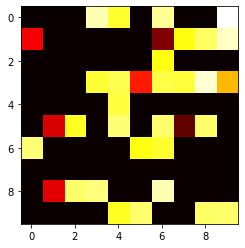

88


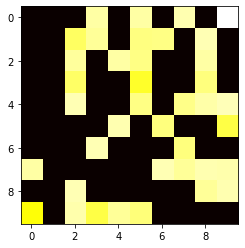

89


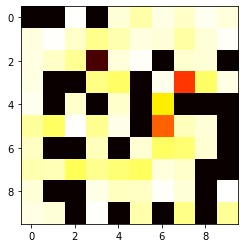

90


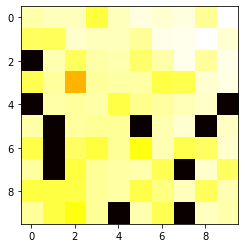

91


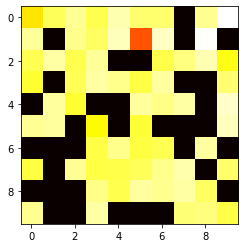

92


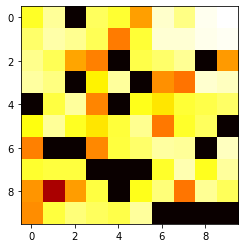

93


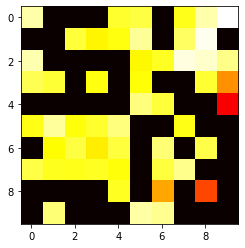

94


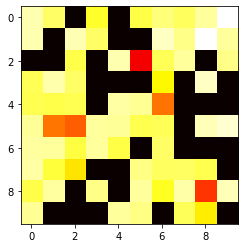

95


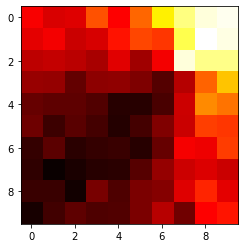

96


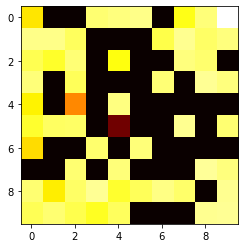

97


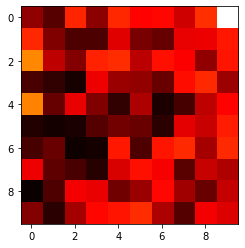

98


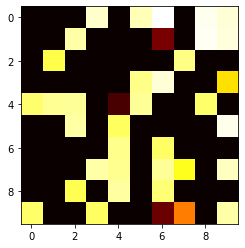

99


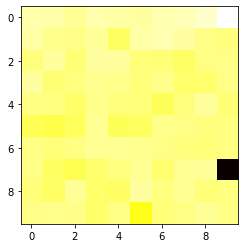

In [24]:
for i in range(100):
    print(i)
    plt.imshow(manager_som.w[i, 2:].reshape(10, 10), cmap='hot', interpolation='nearest')
    plt.show()

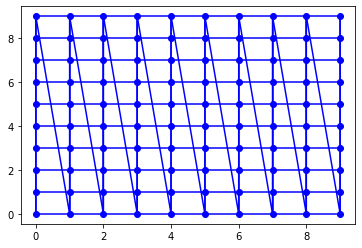

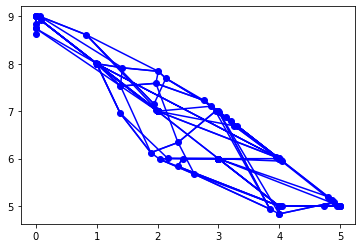

In [25]:
visualize_som(som, [0, 1], location = True)
visualize_som(manager_som, [0, 1])

0


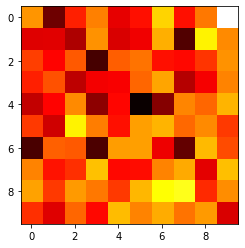

1


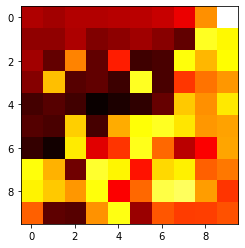

2


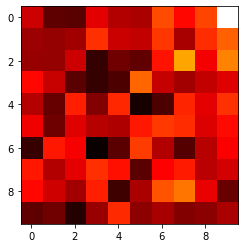

3


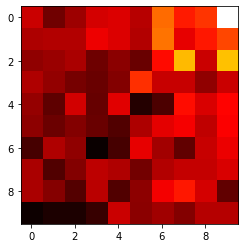

4


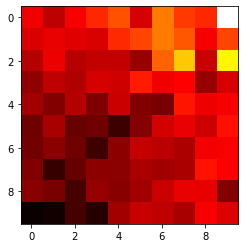

5


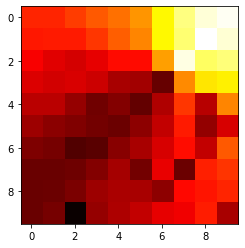

6


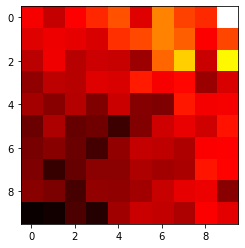

7


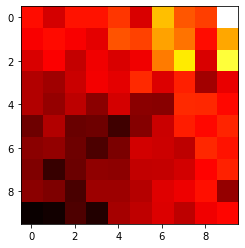

8


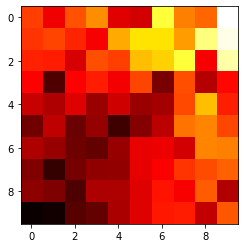

9


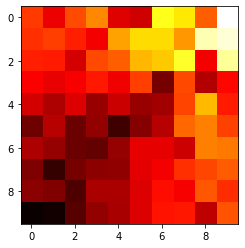

10


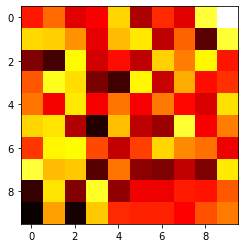

11


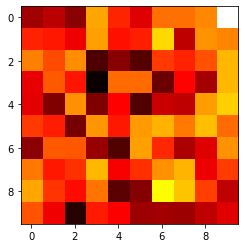

12


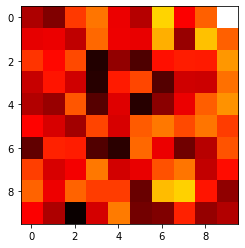

13


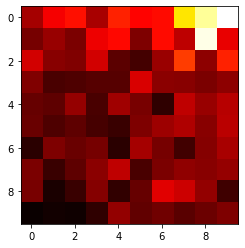

14


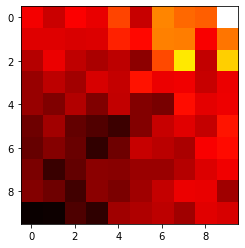

15


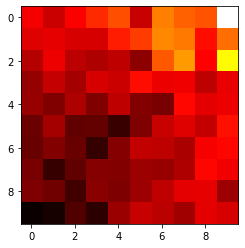

16


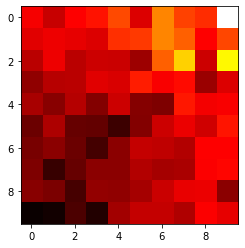

17


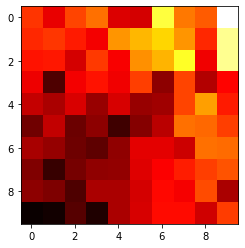

18


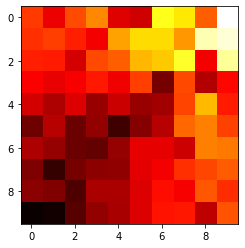

19


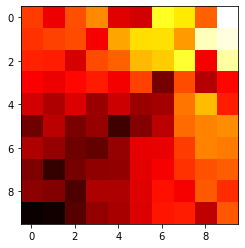

20


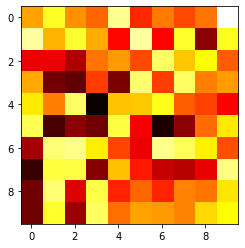

21


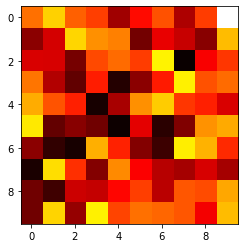

22


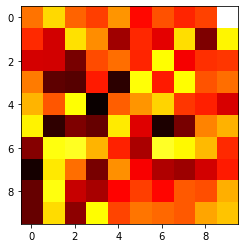

23


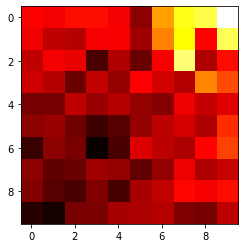

24


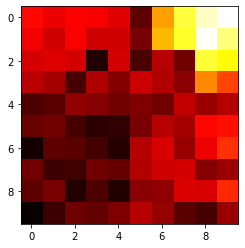

25


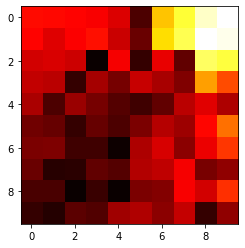

26


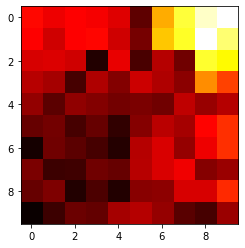

27


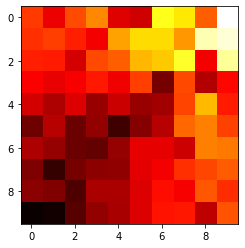

28


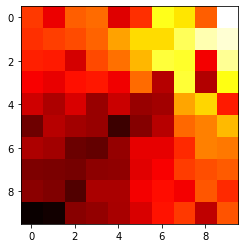

29


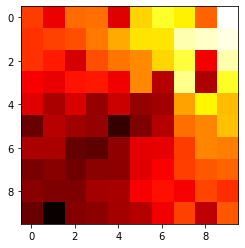

30


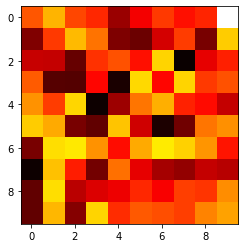

31


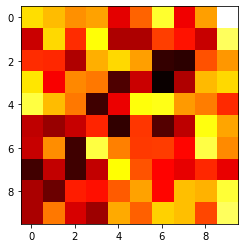

32


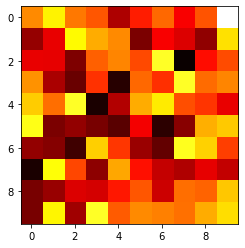

33


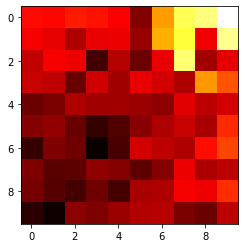

34


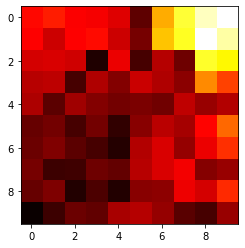

35


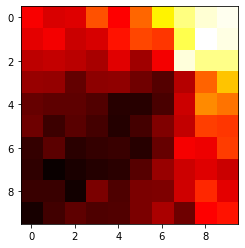

36


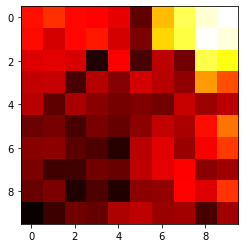

37


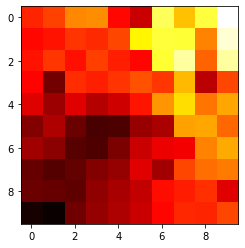

38


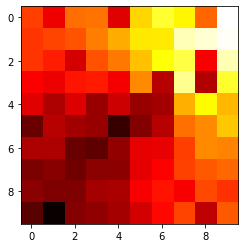

39


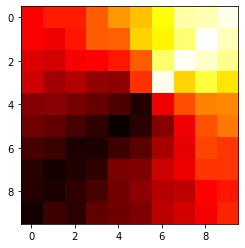

40


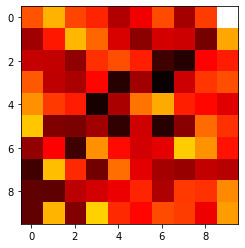

41


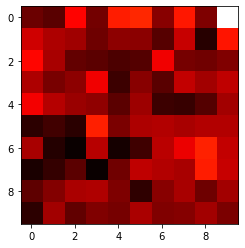

42


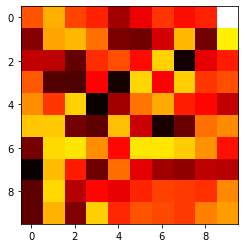

43


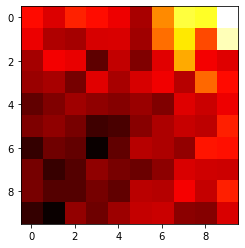

44


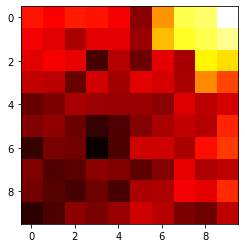

45


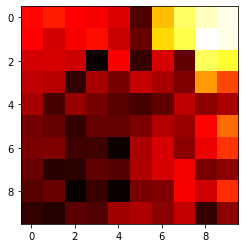

46


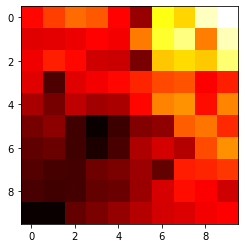

47


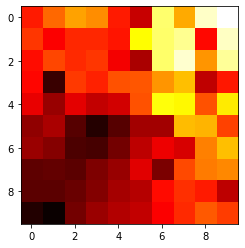

48


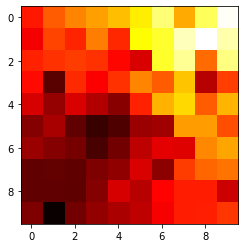

49


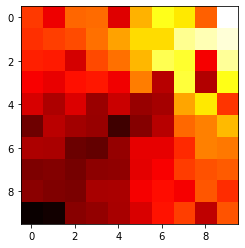

50


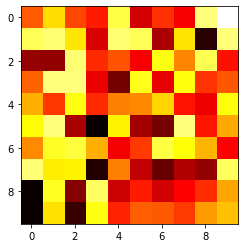

51


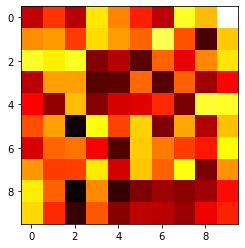

52


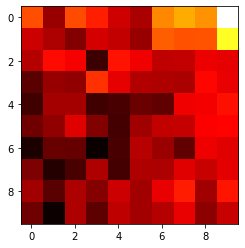

53


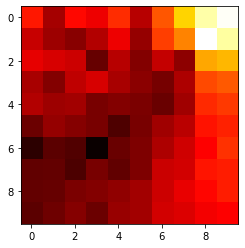

54


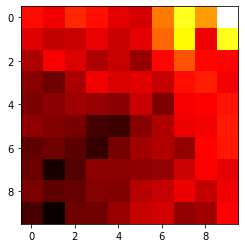

55


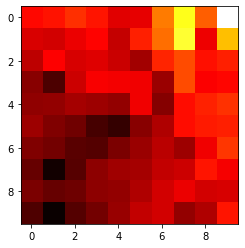

56


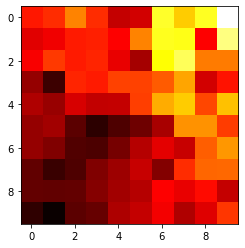

57


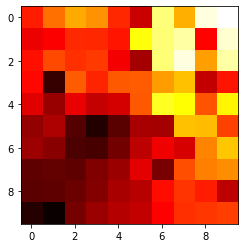

58


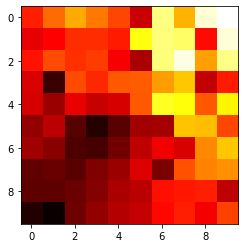

59


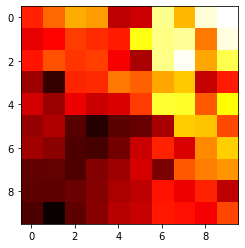

60


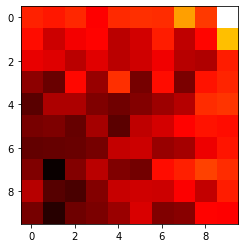

61


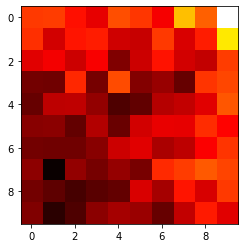

62


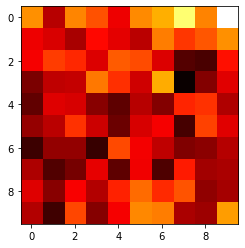

63


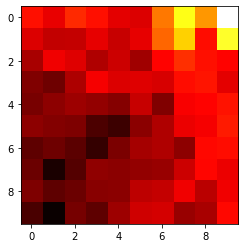

64


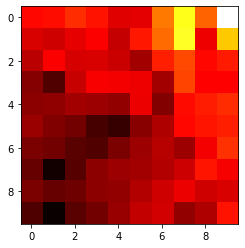

65


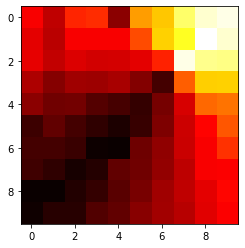

66


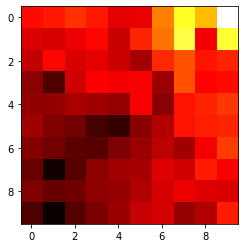

67


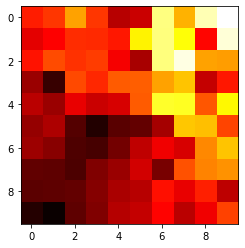

68


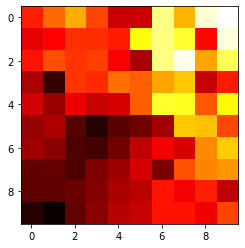

69


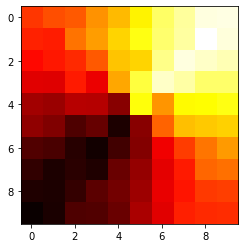

70


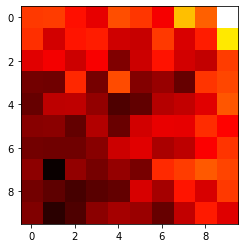

71


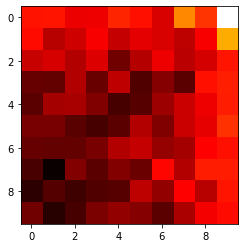

72


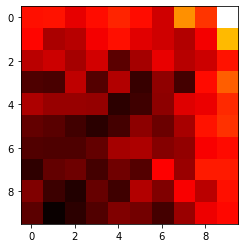

73


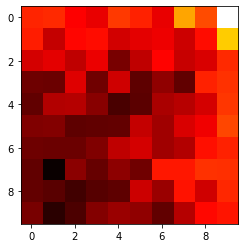

74


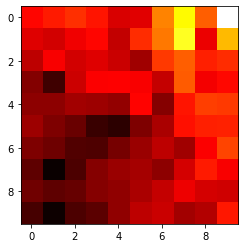

75


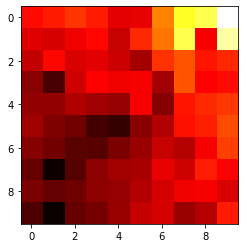

76


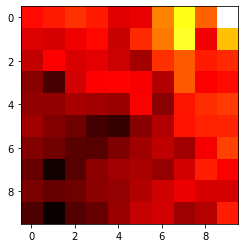

77


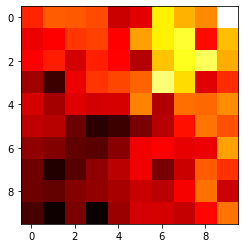

78


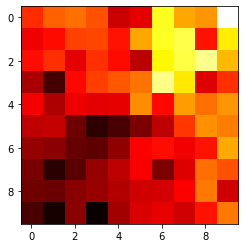

79


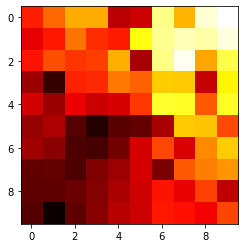

80


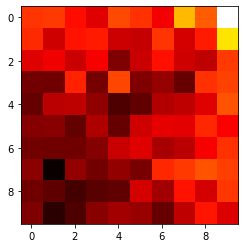

81


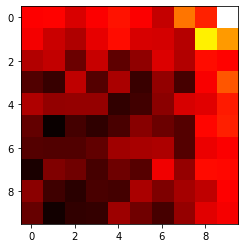

82


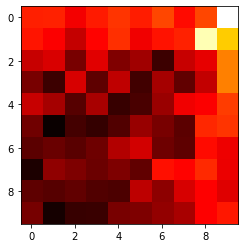

83


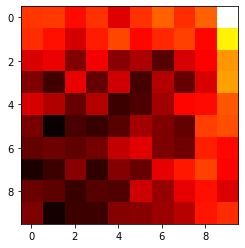

84


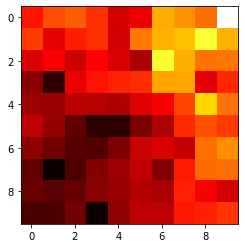

85


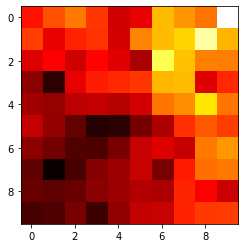

86


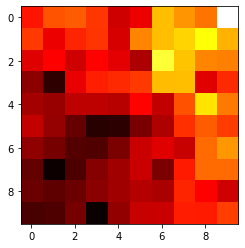

87


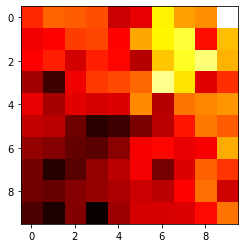

88


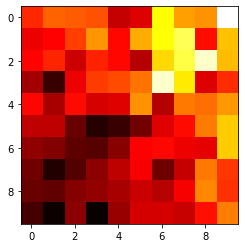

89


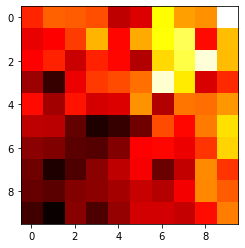

90


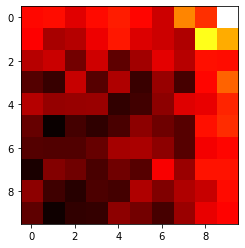

91


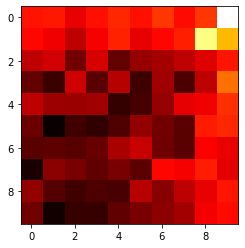

92


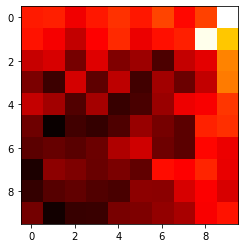

93


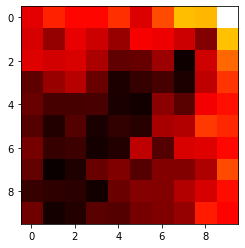

94


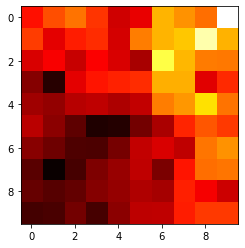

95


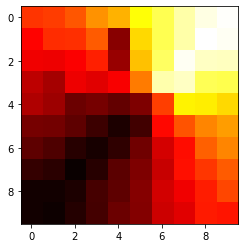

96


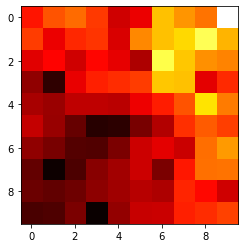

97


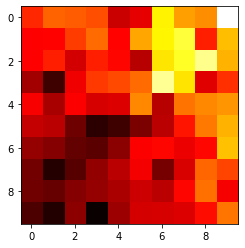

98


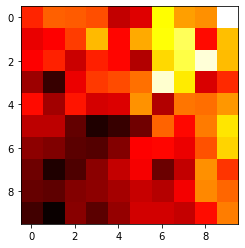

99


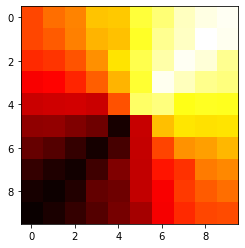

In [26]:
manager_som_filehandler = open("../data/smc_premotor_pid/navigation_task/manager_som_all_neighbors.obj", 'rb')
manager_som = pickle.load(manager_som_filehandler)

for i in range(100):
    print(i)
    plt.imshow(manager_som.w[i, 2:].reshape(10, 10), cmap='hot', interpolation='nearest')
    plt.show()

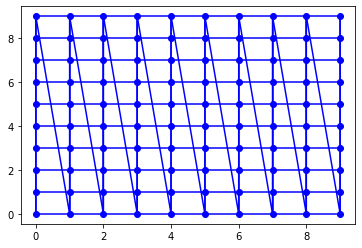

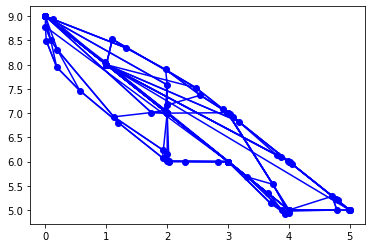

In [27]:
visualize_som(som, [0, 1], location = True)
visualize_som(manager_som, [0, 1])